In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = data.load_data()

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
# Verileri 0-1 arasına sıkıştıralım
X_train = X_train / 255.0
X_test = X_test / 255.0

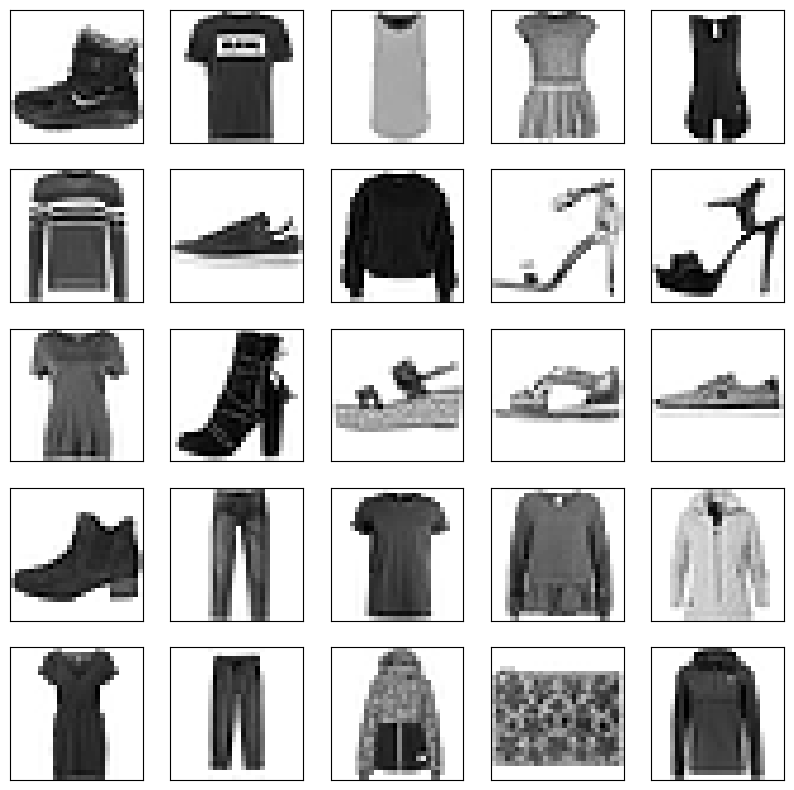

In [13]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

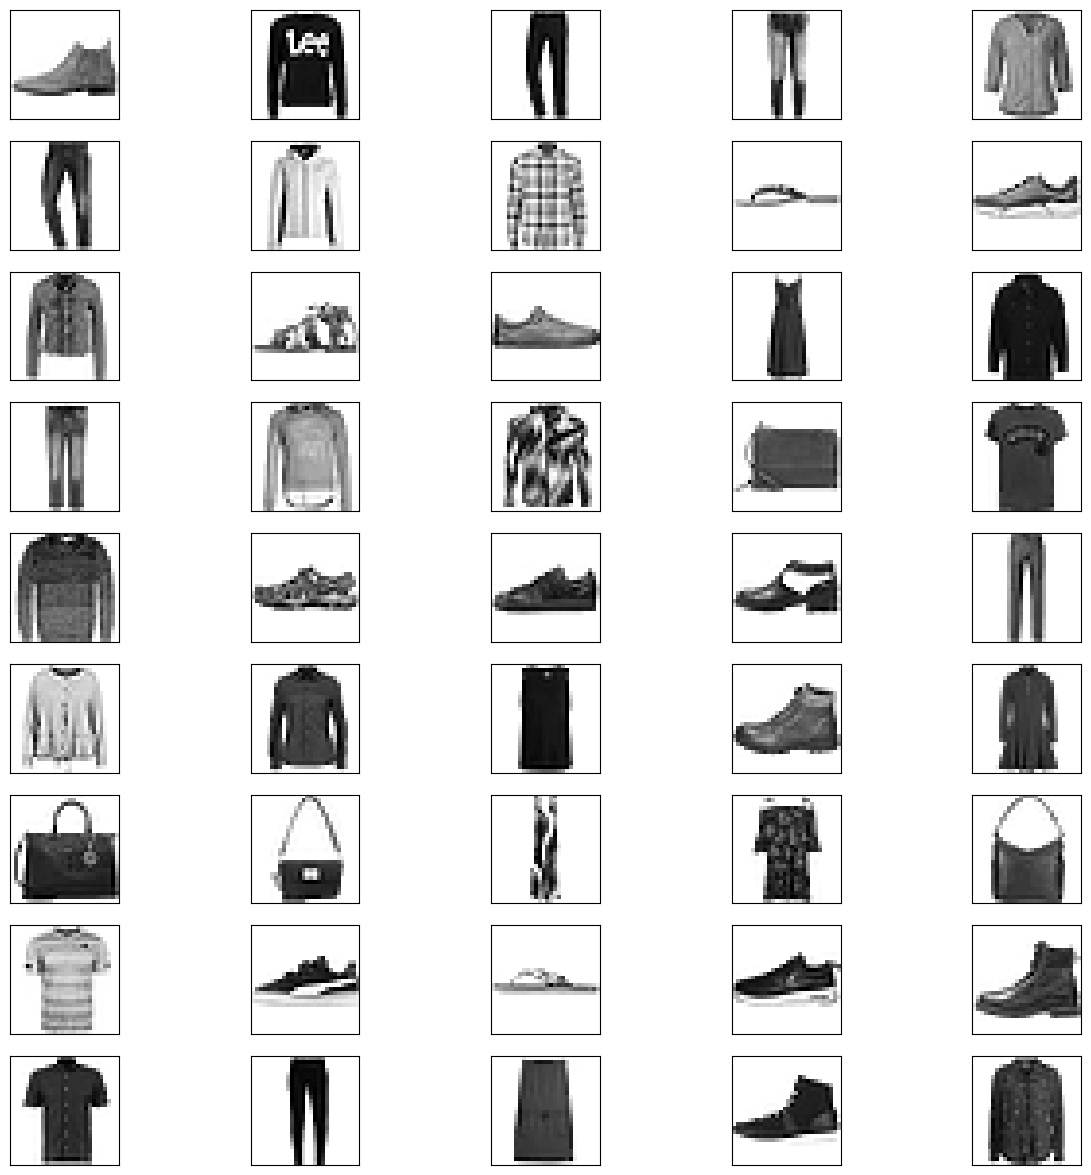

In [14]:
plt.figure(figsize=(15,15))
for i in range(45):
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
plt.show()

In [15]:
model = keras.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='leaky_relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='leaky_relu'),
  layers.Dropout(0.2),
  layers.Dense(64, activation='leaky_relu'),
  layers.Dense(32, activation='leaky_relu'),
  layers.Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=16)

Epoch 1/8
3750/3750 [==============================] - 20s 5ms/step - loss: 0.5529 - accuracy: 0.7982 - val_loss: 0.4429 - val_accuracy: 0.8421
Epoch 2/8
3750/3750 [==============================] - 17s 4ms/step - loss: 0.4324 - accuracy: 0.8433 - val_loss: 0.4053 - val_accuracy: 0.8537
Epoch 3/8
3750/3750 [==============================] - 17s 4ms/step - loss: 0.4000 - accuracy: 0.8532 - val_loss: 0.3850 - val_accuracy: 0.8586
Epoch 4/8
3750/3750 [==============================] - 17s 4ms/step - loss: 0.3806 - accuracy: 0.8604 - val_loss: 0.3933 - val_accuracy: 0.8592
Epoch 5/8
3750/3750 [==============================] - 19s 5ms/step - loss: 0.3638 - accuracy: 0.8664 - val_loss: 0.3643 - val_accuracy: 0.8692
Epoch 6/8
3750/3750 [==============================] - 16s 4ms/step - loss: 0.3539 - accuracy: 0.8707 - val_loss: 0.3950 - val_accuracy: 0.8555
Epoch 7/8
3750/3750 [==============================] - 17s 5ms/step - loss: 0.3423 - accuracy: 0.8741 - val_loss: 0.3715 - val_accuracy:

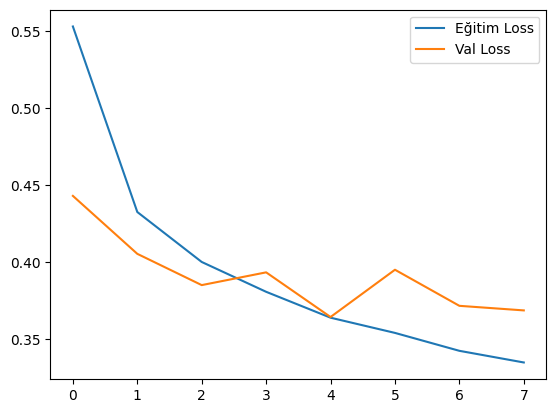

In [19]:
plt.figure()
plt.plot(history.history["loss"], label="Eğitim Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()


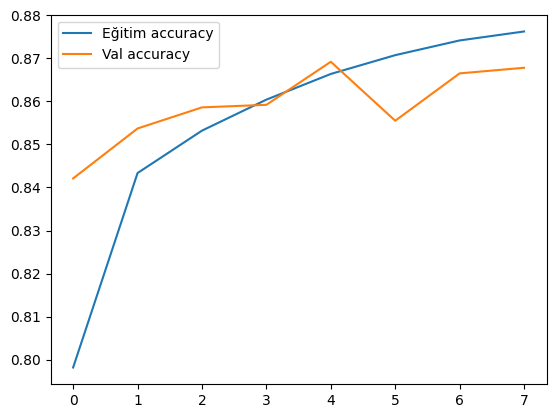

In [20]:
plt.figure()
plt.plot(history.history["accuracy"], label="Eğitim accuracy")
plt.plot(history.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [21]:
predict_y=model.predict(X_test)
predicted_class=np.argmax(predict_y,axis=1)

313/313 [==============================] - 1s 2ms/step


In [22]:

confusion_matrix = metrics.confusion_matrix(y_test,predicted_class)

([<matplotlib.axis.YTick at 0x79c0a88b7250>,
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'pullover'),
  Text(0, 3.5, 'dress'),
  Text(0, 4.5, 'coat'),
  Text(0, 5.5, 'sandal'),
  Text(0, 6.5, 'shirt'),
  Text(0, 7.5, 'sneaker'),
  Text(0, 8.5, 'bag'),
  Text(0, 9.5, 'ankle boot')])

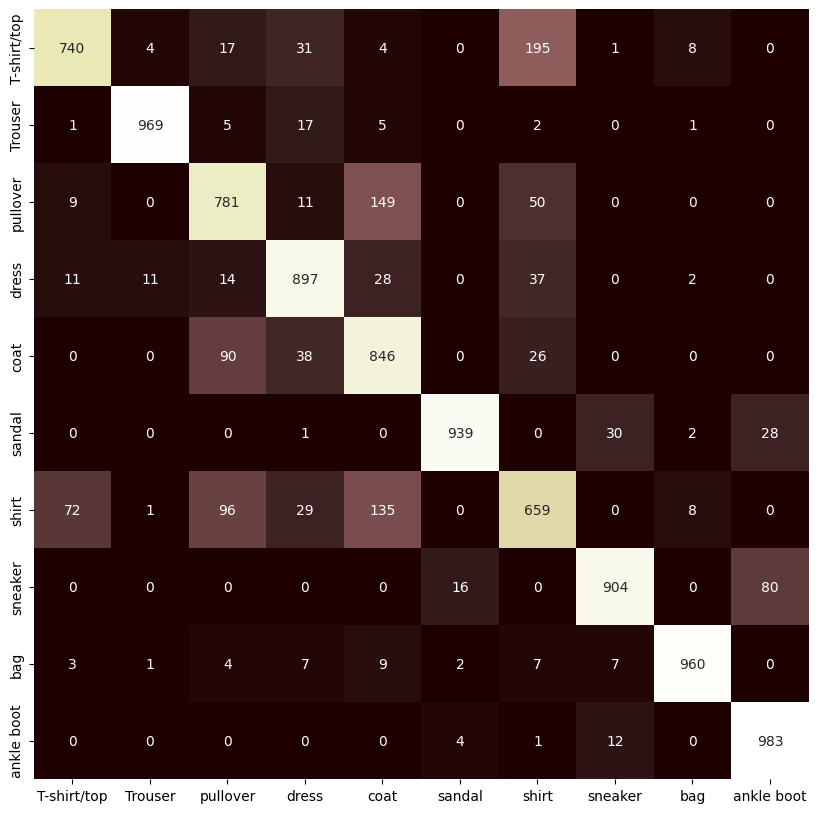

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='pink', cbar=False)
plt.xticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])
plt.yticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])

the prediction is ankle boot


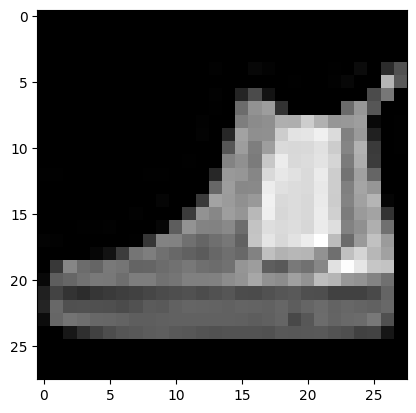

In [25]:
class_name = ['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot']
random_item = np.random.randint(0,1000)
plt.imshow(X_test[random_item], cmap='gray')
print("the prediction is "+ str(class_name[predicted_class[random_item]]))

# CNN ile deneme

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

from IPython.display import SVG
from keras.utils import plot_model

data = keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = data.load_data()

In [13]:
model = keras.Sequential()
# Add convolution 2D
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [15]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [16]:
train_model = model.fit(X_train, y_train,
                  batch_size=32,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_test, y_test)
                  )

Epoch 1/50
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4318 - accuracy: 0.8430 - val_loss: 0.3508 - val_accuracy: 0.8709
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2860 - accuracy: 0.8957 - val_loss: 0.2654 - val_accuracy: 0.9013
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2415 - accuracy: 0.9107 - val_loss: 0.2688 - val_accuracy: 0.9057
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2094 - accuracy: 0.9224 - val_loss: 0.2553 - val_accuracy: 0.9077
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1816 - accuracy: 0.9320 - val_loss: 0.2656 - val_accuracy: 0.9085
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1608 - accuracy: 0.9389 - val_loss: 0.2589 - val_accuracy: 0.9127
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1424 - accuracy: 0.9463 - val_loss: 0.2620 - val_ac

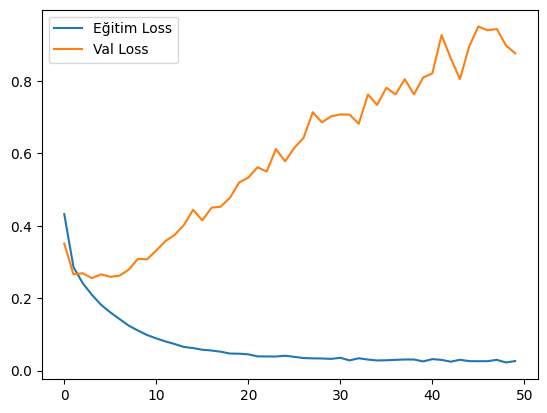

In [19]:
plt.figure()
plt.plot(train_model.history["loss"], label="Eğitim Loss")
plt.plot(train_model.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

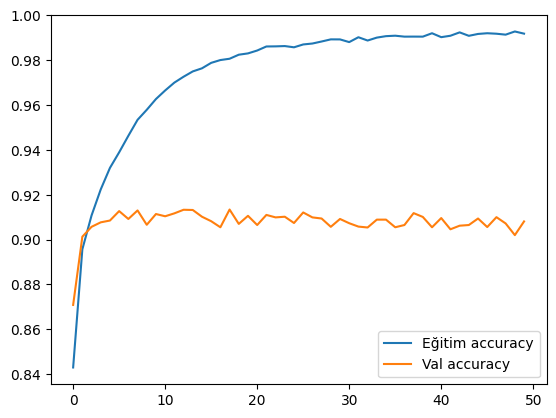

In [21]:
plt.figure()
plt.plot(train_model.history["accuracy"], label="Eğitim accuracy")
plt.plot(train_model.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [ ]:
#Epoch sayısını arttırarak çalıştırdığımızda model aşırı öğrenme yaptı bu durumda modelimizin içinde dropotlaer eklediğimizde daha genellenebilir sonuçlara ulaşabiliriz

In [24]:
# Model
model = keras.Sequential()
# Add convolution 2D
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
# Add dropouts to the model
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

In [27]:
train_model = model.fit(X_train, y_train,
                  batch_size=64,
                  epochs=30,
                  verbose=1,
                  validation_data=(X_test, y_test)
                  )

Epoch 1/30
938/938 [==============================] - 11s 7ms/step - loss: 0.6364 - accuracy: 0.7639 - val_loss: 0.4147 - val_accuracy: 0.8458
Epoch 2/30
938/938 [==============================] - 12s 13ms/step - loss: 0.4117 - accuracy: 0.8476 - val_loss: 0.3302 - val_accuracy: 0.8796
Epoch 3/30
938/938 [==============================] - 8s 9ms/step - loss: 0.3563 - accuracy: 0.8688 - val_loss: 0.3111 - val_accuracy: 0.8852
Epoch 4/30
938/938 [==============================] - 6s 7ms/step - loss: 0.3268 - accuracy: 0.8792 - val_loss: 0.2841 - val_accuracy: 0.8955
Epoch 5/30
938/938 [==============================] - 6s 7ms/step - loss: 0.3058 - accuracy: 0.8874 - val_loss: 0.2838 - val_accuracy: 0.8956
Epoch 6/30
938/938 [==============================] - 6s 7ms/step - loss: 0.2920 - accuracy: 0.8932 - val_loss: 0.2652 - val_accuracy: 0.9031
Epoch 7/30
938/938 [==============================] - 6s 7ms/step - loss: 0.2850 - accuracy: 0.8948 - val_loss: 0.2520 - val_accuracy: 0.9073
Epo

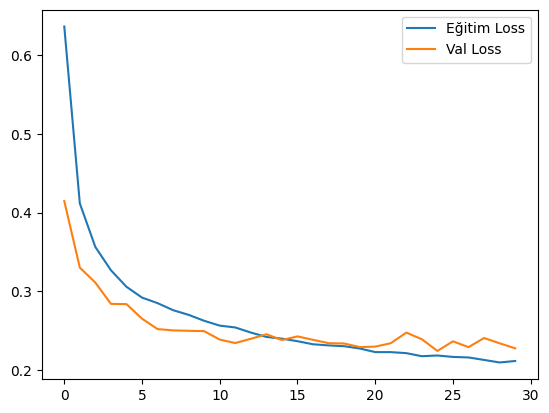

In [28]:
plt.figure()
plt.plot(train_model.history["loss"], label="Eğitim Loss")
plt.plot(train_model.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

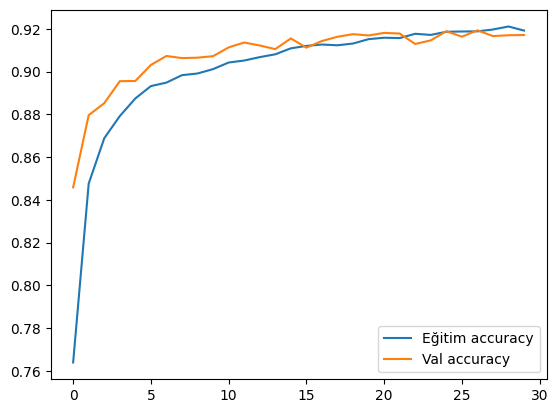

In [29]:
plt.figure()
plt.plot(train_model.history["accuracy"], label="Eğitim accuracy")
plt.plot(train_model.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [34]:
# Bir önceki modelde validasyon aşırı yüksek iken şimdi validasyon değerimiz eğtim verisi ile birlikte düştü  aynı zamanda accuract değeri de benzer şekilde tıkanmadı
# bachsize'ı küçültebilir veya epoch sayısını yükseltebiliriz. şu an ulaşabildiğim optimum odel için 0.9171 validasyon doğruluğu yeterli gibi gözüküyor.
predict_y=model.predict(X_test)
predicted_class= np.argmax(predict_y,axis=1)


313/313 [==============================] - 1s 3ms/step


In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_multiclass = label_encoder.fit_transform(np.argmax(y_test, axis=1))

confusion_matrix = metrics.confusion_matrix(y_test_multiclass,predicted_class)

([<matplotlib.axis.YTick at 0x79adc8388d90>,
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'pullover'),
  Text(0, 3.5, 'dress'),
  Text(0, 4.5, 'coat'),
  Text(0, 5.5, 'sandal'),
  Text(0, 6.5, 'shirt'),
  Text(0, 7.5, 'sneaker'),
  Text(0, 8.5, 'bag'),
  Text(0, 9.5, 'ankle boot')])

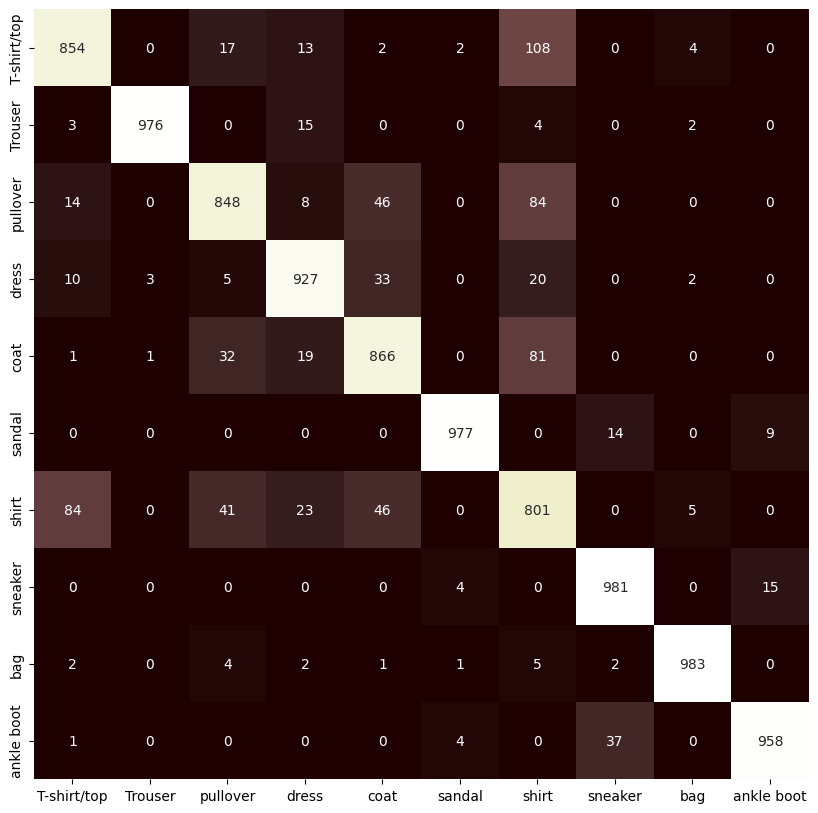

In [36]:

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='pink', cbar=False)
plt.xticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])
plt.yticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])